# Autoregression Model 

In [1]:
# usual imports #
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings(action='ignore')

In [3]:
from pylab import rcParams
rcParams['figure.figsize']=12,5

In [5]:
from statsmodels.tsa.ar_model import AR,ARResults

In [9]:
# import the dataset #
uspop = pd.read_csv('../Data/uspopulation.csv',index_col='DATE',parse_dates=True)

In [10]:
uspop.head()

,PopEst
DATE,
2011-01-01,311037
2011-02-01,311189
2011-03-01,311351
2011-04-01,311522
2011-05-01,311699


In [11]:
uspop.dropna(inplace=True)

In [13]:
uspop.index.freq = 'MS' # Monthly start data series #

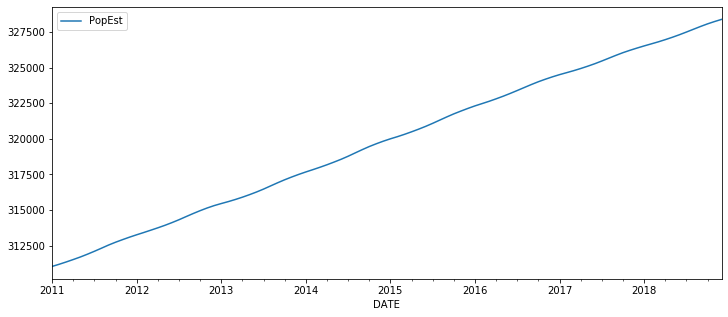

In [14]:
uspop.plot()

In [15]:
# decompose the trend and seasonality of the dataset #
from statsmodels.tsa.seasonal import seasonal_decompose

In [16]:
decompose = seasonal_decompose(uspop['PopEst'],model='additive')

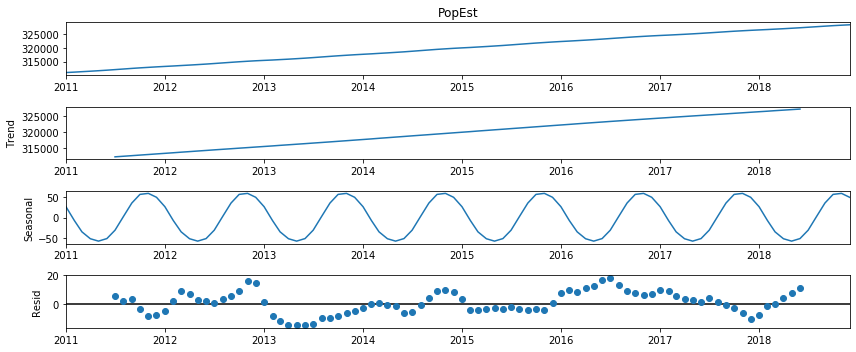

In [17]:
decompose.plot();

- The data has level and trend but no seasonality if we look into the y-axis range of the seasonal plot

In [18]:
uspop.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 96 entries, 2011-01-01 to 2018-12-01
Freq: MS
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   PopEst  96 non-null     int64
dtypes: int64(1)
memory usage: 1.5 KB


In [19]:
# split the data into train and test #
train = uspop.iloc[:84]
test = uspop.iloc[84:]

In [22]:
from pandas.plotting import lag_plot

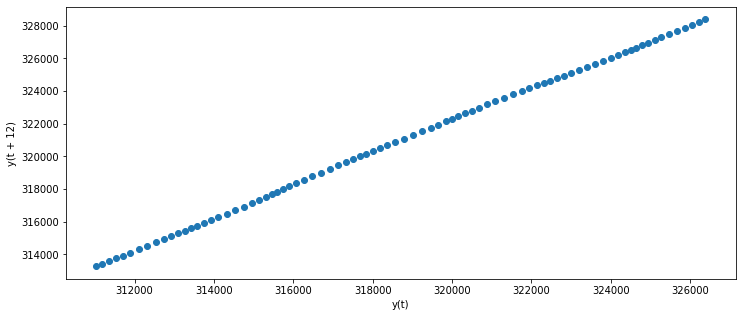

In [24]:
lag_plot(uspop['PopEst'],lag=12)

In [28]:
from statsmodels.tsa.stattools import acf,pacf
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

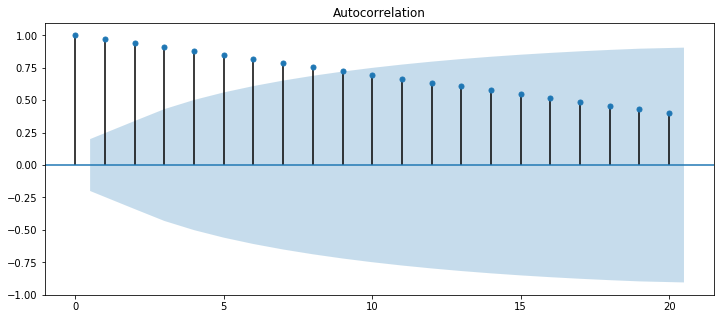

In [30]:
plot_acf(uspop['PopEst']);

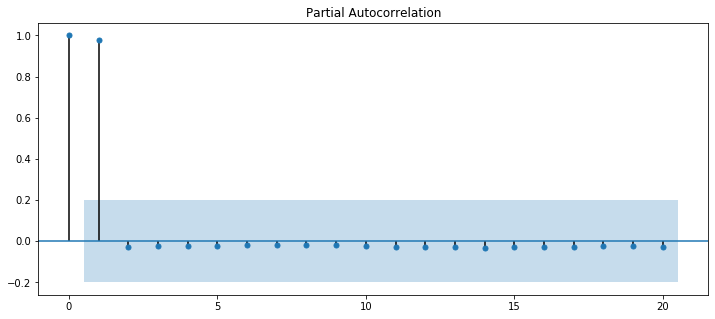

In [32]:
plot_pacf(uspop['PopEst']);

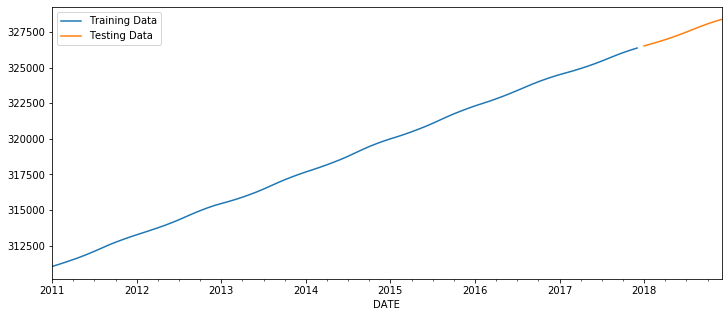

In [34]:
train['PopEst'].plot(legend=True,label='Training Data')
test['PopEst'].plot(legend=True,label='Testing Data');

In [36]:
from pmdarima import auto_arima

In [38]:
auto_arima(uspop['PopEst'],start_p=1,max_p=12).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   96
Model:              SARIMAX(11, 1, 5)   Log Likelihood                -284.502
Date:                Fri, 10 Jul 2020   AIC                            605.005
Time:                        14:18:18   BIC                            650.975
Sample:                             0   HQIC                           623.580
                                 - 96                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     12.2923     10.997      1.118      0.264      -9.261      33.846
ar.L1          1.3063      0.156      8.366      0.000       1.000       1.612
ar.L2         -1.1415      0.262     -4.359      0.000      -1.655      -0.628
ar.L3          0.8752      0.331      2.647      0.008       0.227       1.523
ar.L4         -0.5177      0.379     -1.366      0.172      -1.261       0.225
ar.L5          0.1250      0.398      0.314      0.753      -0.655       0.905
ar.L6         -0.1349      0.392     -0.344      0.730      -0.902       0.633
ar.L7          0.1801      0.344      0.524      0.600      -0.493       0.853
ar.L8         -0.0754      0.342     -0.220      0.826      -0.746       0.596
ar.L9          0.1854      0.296      0.626      0.531      -0.395       0.765
ar.L10        -0.3557      0.217     -1.638      0.101      -0.781       0.070
ar.L11         0.4788      0.133      3.587      0.000       0.217       0.741
ma.L1         -0.0602      0.167     -0.360      0.719      -0.388       0.268
ma.L2          0.4634      0.197      2.354      0.019       0.078       0.849
ma.L3          0.2758      0.192      1.439      0.150      -0.100       0.652
ma.L4         -0.3013      0.161     -1.872      0.061      -0.617       0.014
ma.L5          0.5002      0.230      2.171      0.030       0.049       0.952
sigma2        13.2367      2.140      6.184      0.000       9.042      17.432
===================================================================================
Ljung-Box (Q):                       36.01   Jarque-Bera (JB):                30.13
Prob(Q):                              0.65   Prob(JB):                         0.00
Heteroskedasticity (H):               0.32   Skew:                            -0.85
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.17
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [39]:
# use the AR model and check the optimum order for p #
armodel = AR(uspop['PopEst'])

In [45]:
arfit = armodel.fit(method='mle')

In [42]:
armodel.k_ar

12

In [46]:
arfit.params

const         84.879425
L1.PopEst      2.230476
L2.PopEst     -2.051201
L3.PopEst      1.545750
L4.PopEst     -1.467647
L5.PopEst      1.302989
L6.PopEst     -1.227211
L7.PopEst      1.259080
L8.PopEst     -0.904297
L9.PopEst      0.879066
L10.PopEst    -1.315736
L11.PopEst     1.361894
L12.PopEst    -0.613432
dtype: float64

In [47]:
arfit.k_ar

12

In [48]:
arfit.aic

3.322212302740018

In [52]:
# predict with the AR model with p = 11 or 12 #
test_predictions = arfit.predict(start=len(train),end=len(train)+len(test)-1,dynamic=False).rename('Test Predictions')

In [53]:
test_predictions

DATE
2018-01-01    326520.771964
2018-02-01    326664.417883
2018-03-01    326808.292033
2018-04-01    326963.842429
2018-05-01    327133.747666
2018-06-01    327307.361170
2018-07-01    327499.099089
2018-08-01    327693.282188
2018-09-01    327894.119518
2018-10-01    328075.166936
2018-11-01    328243.203149
2018-12-01    328388.502843
Freq: MS, Name: Test Predictions, dtype: float64

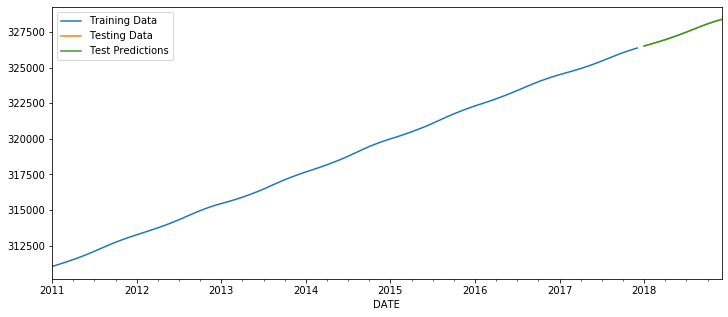

In [54]:
train['PopEst'].plot(legend=True,label='Training Data')
test['PopEst'].plot(legend=True,label='Testing Data')
test_predictions.plot(legend=True,label='Test Predictions')

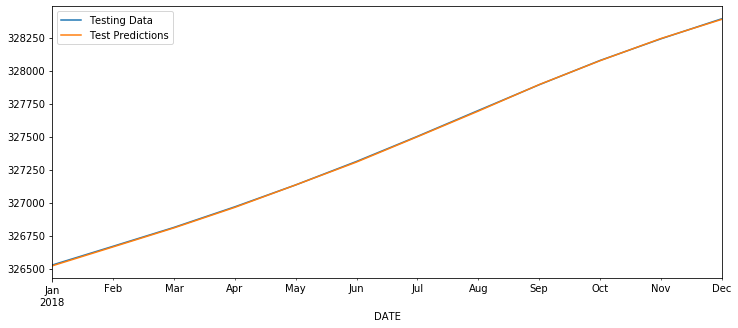

In [57]:
test['PopEst'].iloc[-24:].plot(legend=True,label='Testing Data')
test_predictions.plot(legend=True,label='Test Predictions')

In [58]:
# model evaluation #
from sklearn.metrics import mean_squared_error

In [59]:
rmse = np.sqrt(mean_squared_error(test['PopEst'],test_predictions))

In [60]:
print('Root Mean Squared Error = {}'.format(rmse))

Root Mean Squared Error = 3.794357932357398


In [63]:
# Forecast in the real future of the dataset #

In [62]:
uspop.tail()

,PopEst
DATE,
2018-08-01,327698
2018-09-01,327893
2018-10-01,328077
2018-11-01,328241
2018-12-01,328393


In [81]:
armodel = AR(uspop['PopEst'],freq='MS')

In [82]:
arfit = armodel.fit(maxlag=12,method='mle')

In [89]:
forecast = arfit.predict(start=len(uspop['PopEst']),end=len(uspop['PopEst'])+12,dynamic=False).rename('Forecast')

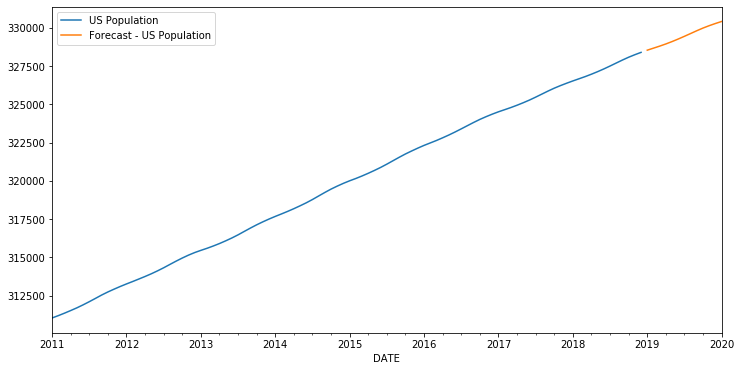

In [90]:
plt.figure(figsize=(12,6))
uspop['PopEst'].plot(legend=True,label='US Population')
forecast.plot(legend=True,label='Forecast - US Population',figsize=(12,6))

In [92]:
forecast.values

array([328536.55552076, 328668.54967367, 328800.96161616, 328943.73779627,
       329098.95346933, 329266.96700338, 329444.14929736, 329626.34980013,
       329809.93176188, 329984.03733944, 330139.42740254, 330281.25211652,
       330412.68041777])